<a href="https://colab.research.google.com/github/eeeewn/IBM2022/blob/main/%EB%B6%84%EB%A5%98_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
!pip install mglearn 
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [108]:
import mglearn
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [109]:
from google.colab import drive
drive.mount('/content/drive')

health = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ITB/health_data.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [110]:
display(health.info())    
display(health.head())
health.isnull().sum() #일부 변수 결측치 많음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HCHK_YEAR          10000 non-null  int64  
 1   IDV_ID             10000 non-null  int64  
 2   SIDO               10000 non-null  int64  
 3   SEX                10000 non-null  object 
 4   AGE_GROUP          10000 non-null  int64  
 5   HEIGHT             10000 non-null  int64  
 6   WEIGHT             10000 non-null  int64  
 7   WAIST              10000 non-null  float64
 8   SIGHT_LEFT         10000 non-null  float64
 9   SIGHT_RIGHT        10000 non-null  float64
 10  HEAR_LEFT          10000 non-null  int64  
 11  HEAR_RIGHT         10000 non-null  int64  
 12  BP_HIGH            9912 non-null   float64
 13  BP_LWST            9912 non-null   float64
 14  BLDS               9912 non-null   float64
 15  TOT_CHOLE          4044 non-null   float64
 16  TRIGLYCERIDE       4044

None

,HCHK_YEAR,IDV_ID,SIDO,SEX,AGE_GROUP,HEIGHT,WEIGHT,WAIST,SIGHT_LEFT,SIGHT_RIGHT,...,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,HCHK_OE_INSPEC_YN,CRS_YN,TTR_YN,DATA_STD__DT
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


HCHK_YEAR               0
IDV_ID                  0
SIDO                    0
SEX                     0
AGE_GROUP               0
HEIGHT                  0
WEIGHT                  0
WAIST                   0
SIGHT_LEFT              0
SIGHT_RIGHT             0
HEAR_LEFT               0
HEAR_RIGHT              0
BP_HIGH                88
BP_LWST                88
BLDS                   88
TOT_CHOLE            5956
TRIGLYCERIDE         5956
HDL_CHOLE            5956
LDL_CHOLE            6023
HMG                    88
OLIG_PROTE_CD         139
CREATININE             88
SGOT_AST               88
SGPT_ALT               88
GAMMA_GTP              88
SMK_STAT_TYPE_CD        2
DRK_YN                  1
HCHK_OE_INSPEC_YN       0
CRS_YN               6749
TTR_YN               6749
DATA_STD__DT            0
dtype: int64

In [111]:
#결측치 제거
health = health.dropna()

In [112]:
#불필요한 변수 제거
health = health.drop(['DATA_STD__DT', 'IDV_ID', 'HCHK_YEAR'], axis=1)

In [113]:
#비만 여부 판단하기 위한 파생변수 만들기
health['BMI'] = health['WEIGHT']/((health['HEIGHT']/100)**2)

import numpy as np
health['obesity'] = np.where(health['BMI'] >=25 , 'Y', 'N') #BMI 25이상인 경우 비만으로 판단

In [114]:
#공복 혈당을 이용한 당뇨 여부 파생변수 생성
health['disbetes'] = np.where(health['BLDS']>=126 , 'Y', 'N') 

In [115]:
#문자형 변수 숫자형으로 바꾸기
health['SEX'] = health['SEX'].replace({'M':1, 'F':2})
health['SMK_STAT_TYPE_CD'] =health['SMK_STAT_TYPE_CD'].replace({'No':0, 'NotNow':1, 'Yes':2})
health['DRK_YN'] =health['DRK_YN'].replace({'No':0, 'Yes':2})
health['disbetes'] =health['disbetes'].replace({'N':0, 'Y':2})

In [116]:
target = health['obesity'] 
health = health.drop(columns = ['obesity', 'BMI','HEIGHT','WEIGHT']) #비만도를 측정하기 위해 사용한 키, 체중 변수 포함시키지 않음
health['obesity'] = target 

In [117]:
health.info()
health.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249 entries, 6 to 9974
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SIDO               1249 non-null   int64  
 1   SEX                1249 non-null   int64  
 2   AGE_GROUP          1249 non-null   int64  
 3   WAIST              1249 non-null   float64
 4   SIGHT_LEFT         1249 non-null   float64
 5   SIGHT_RIGHT        1249 non-null   float64
 6   HEAR_LEFT          1249 non-null   int64  
 7   HEAR_RIGHT         1249 non-null   int64  
 8   BP_HIGH            1249 non-null   float64
 9   BP_LWST            1249 non-null   float64
 10  BLDS               1249 non-null   float64
 11  TOT_CHOLE          1249 non-null   float64
 12  TRIGLYCERIDE       1249 non-null   float64
 13  HDL_CHOLE          1249 non-null   float64
 14  LDL_CHOLE          1249 non-null   float64
 15  HMG                1249 non-null   float64
 16  OLIG_PROTE_CD      1249 

,SIDO,SEX,AGE_GROUP,WAIST,SIGHT_LEFT,SIGHT_RIGHT,HEAR_LEFT,HEAR_RIGHT,BP_HIGH,BP_LWST,...,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,HCHK_OE_INSPEC_YN,CRS_YN,TTR_YN,disbetes,obesity
6,44,1,9,93.0,0.8,0.7,1,2,112.0,73.0,...,18.0,20.0,35.0,2,2,1,0.0,1.0,2,Y
16,30,1,11,90.0,0.6,0.6,1,1,138.0,88.0,...,29.0,54.0,24.0,0,2,1,0.0,1.0,0,Y
21,41,2,11,65.9,0.7,1.0,1,1,114.0,73.0,...,24.0,14.0,12.0,0,0,1,0.0,0.0,0,N
27,11,1,17,82.0,0.5,0.7,1,1,139.0,85.0,...,33.0,22.0,29.0,0,2,1,0.0,0.0,0,N
47,26,1,16,94.0,1.5,0.6,2,2,110.0,72.0,...,28.0,20.0,43.0,0,2,1,0.0,0.0,0,N


#의사결정나무

In [118]:
from sklearn.model_selection import train_test_split
health_train, health_test = train_test_split(health, test_size = 0.25, 
                                             stratify= health['obesity'], random_state=42) 

In [119]:
from sklearn import tree
tree = tree.DecisionTreeClassifier(random_state=42) 

train_x = health_train.drop(columns = 'obesity') 
train_y = health_train['obesity']

test_x = health_test.drop(columns = 'obesity')
test_y = health_test['obesity']

X = health_train.drop(columns = 'obesity') , health_test.drop(columns = 'obesity')
y = health_train['obesity'], health_test['obesity']

model = tree.fit(X = train_x, y = train_y)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(train_x, train_y)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(test_x, test_y)))

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 0.732


In [120]:
from sklearn import tree
tree = tree.DecisionTreeClassifier(max_depth=3, random_state=42)
model = tree.fit(X = train_x, y = train_y)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(train_x, train_y)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(test_x, test_y)))

학습용 데이터 정확도: 0.830
시험용 데이터 정확도: 0.812


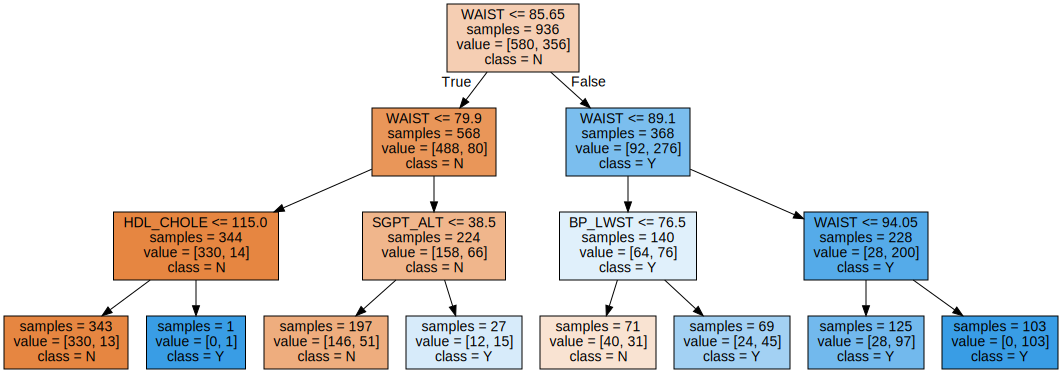

In [121]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree, out_file="tree.dot", class_names=[ "N", "Y"], 
                feature_names=train_x.columns, impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [122]:
result = tree.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.         0.         0.         0.95735718 0.         0.
 0.         0.         0.         0.0149463  0.         0.
 0.         0.00848431 0.         0.         0.         0.
 0.         0.01921221 0.         0.         0.         0.
 0.         0.         0.        ]


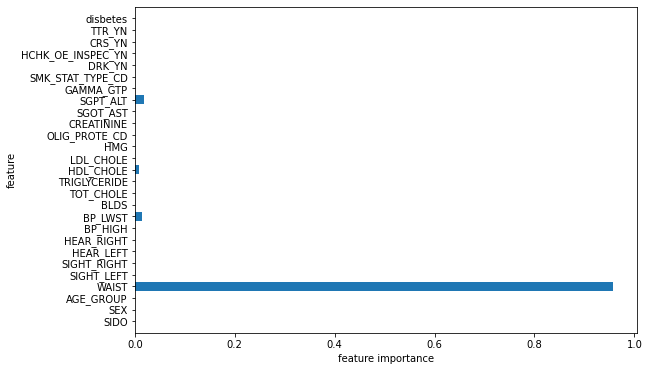

In [123]:
import numpy as np

def plot_feature_importances_health(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(health.columns[:27])
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), health.columns[0:27]) 
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)

plot_feature_importances_health(tree)

In [124]:
res = pd.DataFrame(result)
res["name"] = health.columns[:27]
display(res.info())
 
display(res.sort_values(by='name'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       27 non-null     float64
 1   name    27 non-null     object 
dtypes: float64(1), object(1)
memory usage: 560.0+ bytes


None

,0,name
2,0.000000,AGE_GROUP
10,0.000000,BLDS
8,0.000000,BP_HIGH
9,0.014946,BP_LWST
17,0.000000,CREATININE
24,0.000000,CRS_YN
22,0.000000,DRK_YN
20,0.000000,GAMMA_GTP
23,0.000000,HCHK_OE_INSPEC_YN
13,0.008484,HDL_CHOLE


의사결정나무 모델에 따르면 비만 여부 예측에 가장 중요한 변수는 허리 둘레이다.

#랜덤 포레스트(Random forest)

In [125]:
#100개의 나무 생성
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(train_x, train_y)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(train_x, train_y)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(test_x, test_y)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.796


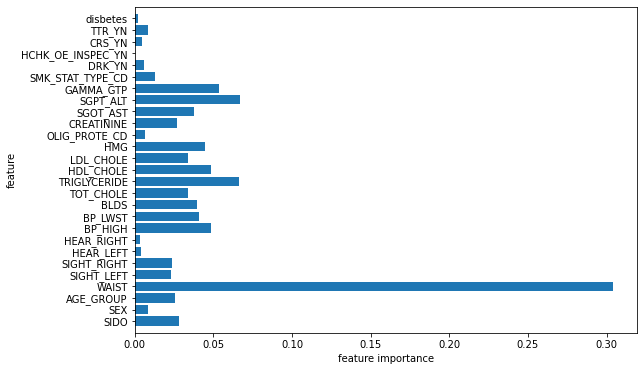

In [126]:
# 단일 의사결정나무의 경우보다 많은 변수(feature)들이 사용됨
plot_feature_importances_health(forest)

랜덤 포레스트 모델에 따르면 비만 여부 예측에 허리 둘레가 가장 중요한 변수이다.

#그래디언트 부스팅(Gradient Boosting)

In [127]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0, max_depth=5)
gbrt.fit(train_x, train_y)

print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(train_x, train_y)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(test_x, test_y)))

학습용 데이터 세트 정확도: 0.999
시험용 데이터 세트 정확도: 0.776


In [128]:
#학습률 감소
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(train_x, train_y)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(train_x, train_y)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(test_x, test_y)))

학습 데이터 세트 정확도: 0.835
시험용 데이터 세트 정확도: 0.796


In [129]:
#나무 깊이 제한
gbrt = GradientBoostingClassifier(random_state=0, max_depth=3)
gbrt.fit(train_x, train_y)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(train_x, train_y)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(test_x, test_y)))

학습 데이터 세트 정확도: 0.935
시험용 데이터 세트 정확도: 0.812


(참고)그리드 서치


In [130]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,4,5,6], 'learning_rate':[0.1,0.08, 0.06, 0.04, 0.02]}

In [131]:
init_gbrt = GradientBoostingClassifier(random_state=0)
grid_gbrt = GridSearchCV(init_gbrt, param_grid=parameters, cv=3, refit=True)
print(grid_gbrt)

grid_gbrt.fit(train_x, train_y)

scores_df = pd.DataFrame(grid_gbrt.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.1, 0.08, 0.06, 0.04, 0.02],
                         'max_depth': [2, 3, 4, 5, 6]})


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'learning_rate': 0.1, 'max_depth': 2}",0.811966,4,0.807692,0.833333,0.794872
1,"{'learning_rate': 0.1, 'max_depth': 3}",0.801282,8,0.798077,0.814103,0.791667
2,"{'learning_rate': 0.1, 'max_depth': 4}",0.791667,16,0.775641,0.807692,0.791667
3,"{'learning_rate': 0.1, 'max_depth': 5}",0.801282,8,0.807692,0.814103,0.782051
4,"{'learning_rate': 0.1, 'max_depth': 6}",0.801282,7,0.788462,0.817308,0.798077
5,"{'learning_rate': 0.08, 'max_depth': 2}",0.808761,5,0.801282,0.833333,0.791667
6,"{'learning_rate': 0.08, 'max_depth': 3}",0.800214,11,0.798077,0.823718,0.778846
7,"{'learning_rate': 0.08, 'max_depth': 4}",0.797009,14,0.794872,0.807692,0.788462
8,"{'learning_rate': 0.08, 'max_depth': 5}",0.787393,21,0.785256,0.807692,0.769231
9,"{'learning_rate': 0.08, 'max_depth': 6}",0.789530,19,0.785256,0.798077,0.785256


In [132]:
print('GridSearchCV 최적 파라미터:', grid_gbrt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_gbrt.best_score_))

GridSearchCV 최적 파라미터: {'learning_rate': 0.02, 'max_depth': 2}
GridSearchCV 최고 정확도: 0.8162


In [133]:
#최적의 파라미터 
gbrt = GradientBoostingClassifier(random_state=0, max_depth=2,learning_rate=0.02)
gbrt.fit(train_x, train_y)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(train_x, train_y)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(test_x, test_y)))

학습 데이터 세트 정확도: 0.826
시험용 데이터 세트 정확도: 0.818


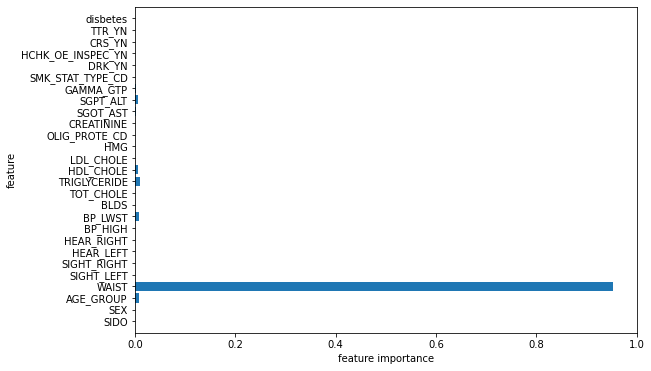

In [134]:
plot_feature_importances_health(gbrt)

그래디언트 부스팅에 따르면 비만 예측에 가장 중요한 변수는 허리둘레이다.

#분류 모델 평가

##교차검증

In [135]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=10, shuffle =True, random_state=0)

dt_scores = cross_val_score(tree, train_x, train_y, cv=kf, scoring='accuracy') 
rf_scores = cross_val_score(forest, train_x, train_y, cv=kf, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, train_x, train_y, cv=kf, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 
print("Gradient boosting: ", gbrt_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean()))

Accuracy
Decision tree:  [0.78723404 0.80851064 0.69148936 0.79787234 0.70212766 0.87234043
 0.79569892 0.78494624 0.8172043  0.72043011]
Random forest:  [0.77659574 0.86170213 0.72340426 0.79787234 0.71276596 0.90425532
 0.80645161 0.8172043  0.88172043 0.74193548]
Gradient boosting:  [0.82978723 0.81914894 0.74468085 0.82978723 0.71276596 0.89361702
 0.8172043  0.83870968 0.87096774 0.77419355]
Accuracy mean
Decision tree :0.778
Random forest :0.802
Gradient boosting :0.813


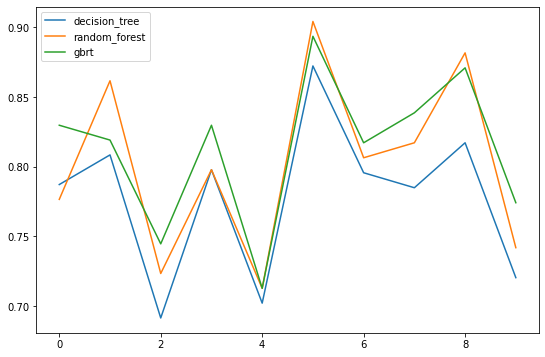

In [136]:
cv_list = [    
            ['decision_tree',dt_scores],
            ['random_forest',rf_scores],
            ['gbrt',gbrt_scores]
          ]
df = pd.DataFrame.from_dict(dict(cv_list))
df.plot()

세 모델을 교차 검증한 결과, 평균 정확도은 의사결정나무 0.778, 랜덤포레스트 0.802, 그래디언트 부스팅 0.813으로 평균 정확도는 그래디언트 부스팅이 가장 높다. 



##모델 평가 지표

In [137]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix 

print(test_y.value_counts())

dt_pred = tree.predict(test_x)
rf_pred = forest.predict(test_x)
grid_gbrt_pred = grid_gbrt.predict(test_x)

# 예측 결과인 pred와 실제 결과인 y_test의 Confusion Matrix 출력
print('Decision tree 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(test_y, dt_pred)))
print(confusion_matrix(test_y, dt_pred))
print('Random forest 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(test_y, rf_pred)))
print(confusion_matrix(test_y, rf_pred))
print('Gradient boosting 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(test_y, grid_gbrt_pred)))
print(confusion_matrix(test_y, grid_gbrt_pred))

N    194
Y    119
Name: obesity, dtype: int64
Decision tree 시험용 데이터 세트 정확도:0.812
[[168  26]
 [ 33  86]]
Random forest 시험용 데이터 세트 정확도:0.796
[[170  24]
 [ 40  79]]
Gradient boosting 시험용 데이터 세트 정확도:0.818
[[172  22]
 [ 35  84]]


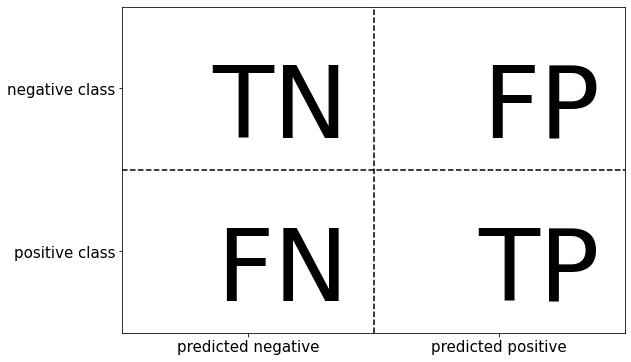

In [138]:
mglearn.plots.plot_binary_confusion_matrix()  #비만 = positive

In [139]:
#의사결정나무
print('정밀도:{:.3f}'.format(precision_score (test_y, dt_pred, average='binary', pos_label="Y")))  # pos_label = 1 기본값
print('재현율:{:.3f}'.format(recall_score(test_y, dt_pred, average='binary', pos_label="Y")))
print('f1-measure:{:.3f}'.format(f1_score(test_y, dt_pred, average='binary', pos_label="Y")))

정밀도:0.768
재현율:0.723
f1-measure:0.745


In [140]:
#랜덤포레스트
print('정밀도:{:.3f}'.format(precision_score (test_y, rf_pred, average='binary', pos_label="Y")))  # pos_label = 1 기본값
print('재현율:{:.3f}'.format(recall_score(test_y, rf_pred, average='binary', pos_label="Y")))
print('f1-measure:{:.3f}'.format(f1_score(test_y, rf_pred, average='binary', pos_label="Y")))

정밀도:0.767
재현율:0.664
f1-measure:0.712


In [141]:
#그래디언트 부스팅
print('정밀도:{:.3f}'.format(precision_score (test_y, grid_gbrt_pred, average='binary', pos_label="Y")))  # pos_label = 1 기본값
print('재현율:{:.3f}'.format(recall_score(test_y, grid_gbrt_pred, average='binary', pos_label="Y")))
print('f1-measure:{:.3f}'.format(f1_score(test_y, grid_gbrt_pred, average='binary', pos_label="Y")))

정밀도:0.792
재현율:0.706
f1-measure:0.747


In [142]:
from sklearn.metrics import classification_report

# 각 클래스가 Positive일 때의 정밀도, 재현율, f1 값을 보여줌
print("Decision Tree:")
print(classification_report(test_y, dt_pred, target_names=["N", "Y"]))
print("Random Forest:")
print(classification_report(test_y, rf_pred, target_names=["N", "Y"]))
print("Gradient Boosting:")
print(classification_report(test_y, grid_gbrt_pred, target_names=["N", "Y"]))

Decision Tree:
              precision    recall  f1-score   support

           N       0.84      0.87      0.85       194
           Y       0.77      0.72      0.74       119

    accuracy                           0.81       313
   macro avg       0.80      0.79      0.80       313
weighted avg       0.81      0.81      0.81       313

Random Forest:
              precision    recall  f1-score   support

           N       0.81      0.88      0.84       194
           Y       0.77      0.66      0.71       119

    accuracy                           0.80       313
   macro avg       0.79      0.77      0.78       313
weighted avg       0.79      0.80      0.79       313

Gradient Boosting:
              precision    recall  f1-score   support

           N       0.83      0.89      0.86       194
           Y       0.79      0.71      0.75       119

    accuracy                           0.82       313
   macro avg       0.81      0.80      0.80       313
weighted avg       0.82  

[비만 예측 모델]


비만을 예측하기 위해 의사결정나무, 랜덤 포레스트, 그래디언트 부스팅과 같은 모델을 사용 분류해본 결과, 비만의 여부를 결정하기 위해 가장 중요한 변수는 허리 둘레이다. 

세 모델 중 그래디언트 부스팅 모델이 가장 예측의 정확도(82%)가 높았다. 

비만이란 질병은 사후 관리보다는 사전 예방이 더 중요한 질병이다. 즉, 예측해서 맞춘 비율인 정밀도가 실제 데이터에서 찾아내는 비율인 재현율보다 중요하다.  
 따라서 다른 모델과 비교해봤을 때 정확도가 가장 높고 정밀도가 높은 그래디언트 부스팅이 가장 적합한 모델이라고 할 수 있다.
